# Adam's First SQL

In [1]:
# pip install pyspark
# pip install pyspark

In [2]:
# Load libraries
import numpy as np
import pandas as pd
from IPython.display import Image
import scipy.stats as stats
import matplotlib.pyplot as plt
# from datetime import datetime
# from datetime import timedelta
import seaborn as sns
# import math
# import random
# import calendar
# from scipy.stats import ttest_ind
### Adding Plotly library for Gannt charts
import plotly.figure_factory as ff
import plotly
# from pyspark.sql import SparkSession
from bs4 import BeautifulSoup
import requests

/Users/adamgoyer/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Project description <br>
You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides. <br>
Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency. <br>

# Description of the data
## A database with info on taxi rides in Chicago:
### neighborhoods table: data on city neighborhoods
* name: name of the neighborhood
* neighborhood_id: neighborhood code
### cabs table: data on taxis
* cab_id: vehicle code
* vehicle_id: the vehicle's technical ID
* company_name: the company that owns the vehicle
### trips table: data on rides
* trip_id: ride code
* cab_id: code of the vehicle operating the ride
* start_ts: date and time of the beginning of the ride (time rounded to the hour)
* end_ts: date and time of the end of the ride (time rounded to the hour)
* duration_seconds: ride duration in seconds
* distance_miles: ride distance in miles
* pickup_location_id: pickup neighborhood code
* dropoff_location_id: dropoff neighborhood code
### weather_records table: data on weather
* record_id: weather record code
* ts: record date and time (time rounded to the hour)
* temperature: temperature when the record was taken
* description: brief description of weather conditions, e.g. "light rain" or "scattered clouds"

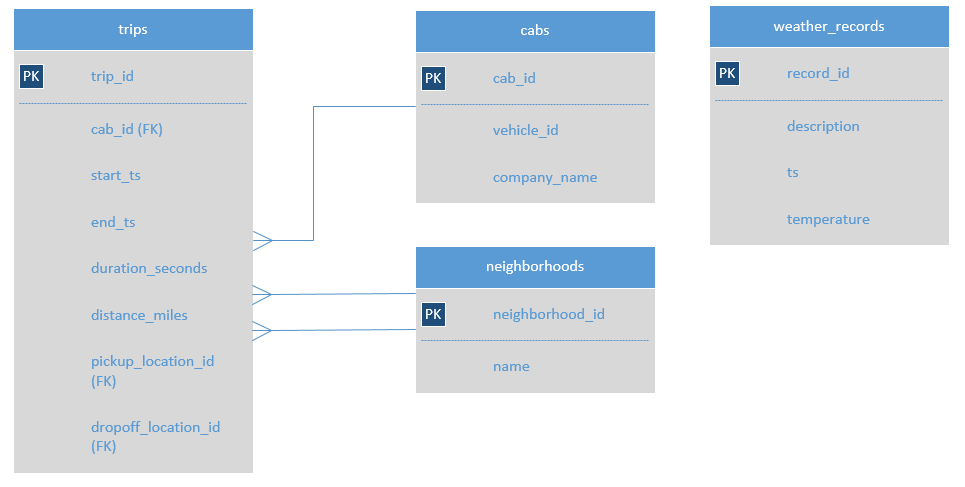

In [3]:
# Table scheme
Image(filename='Practicum_sql_project_table_scheme.png')

# If in Jupyter Notebook (Labs only?), you can use the following code to display the image:
# ![image.png](attachment:Practicum_sql_project_table_scheme.png)

Note: there isn't a direct connection between the tables trips and weather_records in the database. But you can still use JOIN and link them using the time the ride started (trips.start_ts) and the time the weather record was taken (weather_records.ts).
Instructions on completing the project
Step 1. Write a code to parse the data on weather in Chicago in November 2017 from the website:
https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html


# Step 2 Exploratory data analysis (SQL)

# Step 1
Write a code to parse the data on weather in Chicago in November 2017 from the website: <br>
[https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html) <BR>
The name of the DataFrame should be weather_records, and it should be specified when you search: attrs={"id": "weather_records"} . Print the DataFrame in its entirety. <BR>

In [4]:

URL='https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id": "weather_records"})
heading_table=[]
for row in table.find_all('th'):
    heading_table.append(row.text)   
content=[]
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns = heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


### 2.1
Print the company_name field. Find the number of taxi rides for each taxi company for November 15-16, 2017, name the resulting field trips_amount, and print it, too. Sort the results by the trips_amount field in descending order.

In [5]:
### SQL queries

# SELECT cabs.company_name, COUNT(*) AS trips_amount
# FROM cabs
# INNER JOIN trips ON cabs.cab_id = trips.cab_id
# WHERE CAST(start_ts AS DATE) BETWEEN '2017-11-15' AND '2017-11-16'
# GROUP BY cabs.company_name
# ORDER BY trips_amount DESC;


### 2.2
Find the number of taxi rides for each taxi company for November 15-16, 2017. Name the resulting field trips_amount and print it along with the company_name field. Sort the results by the trips_amount field in descending order.

In [6]:
### SQL queries

# SELECT cabs.company_name, COUNT(*) AS trips_amount
# FROM cabs
# INNER JOIN trips ON cabs.cab_id = trips.cab_id
# WHERE CAST(start_ts AS DATE) BETWEEN '2017-11-15' AND '2017-11-16'
# GROUP BY cabs.company_name
# ORDER BY trips_amount DESC;

### 2.3
Find the number of rides for every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017. Name the resulting variable trips_amount. Group the results by the company_name field.

In [7]:
### SQL queries

# SELECT
#   CASE
#     WHEN cabs.company_name = 'Flash Cab' THEN 'Flash Cab'
#     WHEN cabs.company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
#     ELSE 'Other'
#   END AS company,
#   COUNT(*) AS trips_amount
# FROM cabs
# INNER JOIN trips ON cabs.cab_id = trips.cab_id
# WHERE CAST(start_ts AS DATE) BETWEEN '2017-11-01' AND '2017-11-07'
# GROUP BY company
# ORDER BY trips_amount DESC;


### 2.4
Retrieve the identifiers of the O'Hare and Loop neighborhoods from the neighborhoods table.

In [8]:
### SQL queries

# SELECT 
#     neighborhood_id,
#     name
# FROM 
#     neighborhoods
# WHERE 
#     name LIKE '%Hare' OR name LIKE 'Loop'


### 2.5
For each hour, retrieve the weather condition records from the weather_records table. Using the CASE operator, break all hours into two groups: Bad if the description field contains the words rain or storm, and Good for others. Name the resulting field weather_conditions. The final table must include two fields: date and hour (ts) and weather_conditions.

In [9]:
### SQL queries

# SELECT
#   ts,
#   CASE
#     WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
#     ELSE 'Good'
#   END AS weather_conditions
# FROM weather_records;


### 2.6
Retrieve from the trips table all the rides that started in the Loop (pickup_location_id: 50) on a Saturday and ended at O'Hare (dropoff_location_id: 63). Get the weather conditions for each ride. Use the method you applied in the previous task. Also, retrieve the duration of each ride. Ignore rides for which data on weather conditions is not available.
The table columns should be in the following order:
start_ts
weather_conditions
duration_seconds
Sort by trip_id.

In [10]:
### SQL queries

# SELECT
#     start_ts,
#     T.weather_conditions,
#     duration_seconds
# FROM 
#     trips
# INNER JOIN (
#     SELECT
#         ts,
#         CASE
#             WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
#             ELSE 'Good'
#         END AS weather_conditions
#     FROM 
#         weather_records          
# ) T on T.ts = trips.start_ts
# WHERE 
#     pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT (DOW from trips.start_ts) = 6
# ORDER BY trip_id

# Step 3. Test the hypothesis (Python)

Test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturdays. <br>
Retrieve the identifiers of the O'Hare and Loop neighborhoods from the neighborhoods table. <br>

For each hour, retrieve the weather condition records from the weather_records table. Using the CASE operator, break all hours into two groups: "Bad" if the description field contains the words "rain" or "storm," and "Good" for others. Name the resulting field weather_conditions. The final table must include two fields: date and hour (ts) and weather_conditions. <br>

Retrieve from the trips table all the rides that started in the Loop (neighborhood_id: 50) and ended at O'Hare (neighborhood_id: 63) on a Saturday. Get the weather conditions for each ride. Use the method you applied in the previous task. Also retrieve the duration of each ride. Ignore rides for which data on weather conditions is not available. <br>

# Step 4. Exploratory data analysis (Python) 
Test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturdays

### 4.1 Import 2 CSV files with Data

You now have these two CSVs:
/datasets/project_sql_result_01.csv. 

It contains the following data: <br>
company_name: taxi company name <br>
trips_amount: the number of rides for each taxi company on November 15-16, 2017. <br>

/datasets/project_sql_result_04.csv. 

It contains the following data:<br>
dropoff_location_name: Chicago neighborhoods where rides ended<br>
average_trips: the average number of rides that ended in each neighborhood in November 2017.<br>


In [11]:
# Load /datasets/project_sql_result_01.csv

try:
    df_sql_01 = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_01.csv')
except:
    df_sql_01 = pd.read_csv('/datasets/project_sql_result_01.csv')

df_sql_01.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [12]:
# Load /datasets/project_sql_result_04.csv.

try:
    df_sql_04 = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_04.csv')
except:
    df_sql_04 = pd.read_csv('/datasets/project_sql_result_04.csv')

df_sql_04.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


For these two datasets you now need to: <br> 
* import the files<br>
* study the data they contain<br>
* make sure the data types are correct<br>
* identify the top 10 neighborhoods in terms of drop-offs<br>

In [13]:
# Make sure the data types are correct. df_sql_01
df_sql_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [14]:
# Make sure the data types are correct. 04
df_sql_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [15]:
# Identify the top 10 neighborhoods in terms of drop-offs.
df_sql_04.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs<br>
draw conclusions based on each graph and explain the results<br>

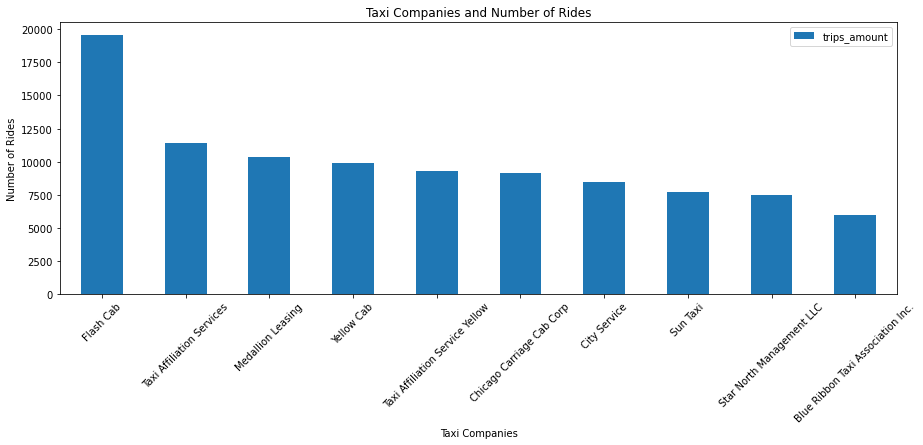

In [16]:
# Graph taxi companies and number of rides

# 10 colors (ugly)
colors_10 = ['red','blue','green','pink','yellow','black','purple','cyan','orange','gray']
# for some reason using a color map returns the same color for all the bars.

# Plot
df_sql_01.sort_values('trips_amount', ascending=False).head(10).plot(kind='bar', figsize=(15, 5), stacked=False, x='company_name', y='trips_amount')#),color=colors_10) -- removed the colors, ugly
# Title
plt.title('Taxi Companies and Number of Rides')
# x label
plt.xlabel('Taxi Companies')
# rotate the x axis labels
plt.xticks(rotation=45)
# y label
plt.ylabel('Number of Rides')
plt.show()

Flash cab has a significant marketshare lead.

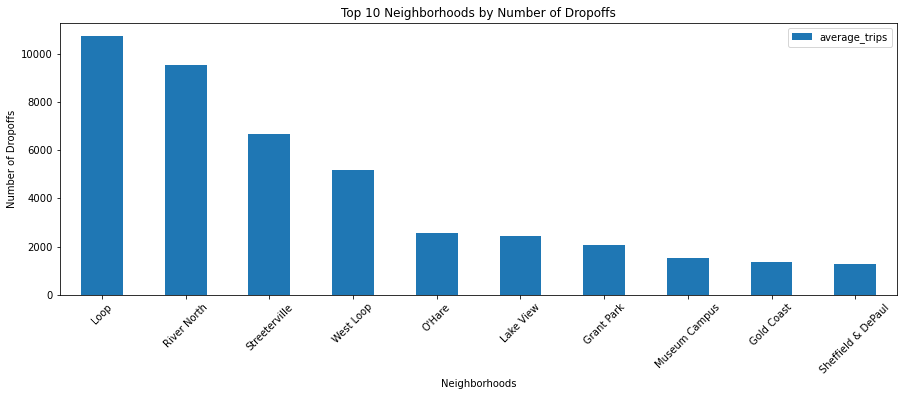

In [17]:
# Plot top 10 neighborhoods by number of dropoffs
df_sql_04.sort_values(by='average_trips', ascending=False).head(10).plot(kind='bar', figsize=(15, 5), stacked=False, x='dropoff_location_name', y='average_trips') #,color=colors_10) -- removed the colors
# Title
plt.title('Top 10 Neighborhoods by Number of Dropoffs')
# x label
plt.xlabel('Neighborhoods')
# rotate the x axis labels
plt.xticks(rotation=45)
# y label
plt.ylabel('Number of Dropoffs')
plt.show()

The Top 10 Neighborhoods by Dropoff.
The top 4 Neighborhoods, Loop, River North, Streeterville, and Westloop have the most volume by ~ 2x to 4x

# Step 5. Testing hypotheses (Python)<br>

/datasets/project_sql_result_07.csv — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:<br
* start_ts<br>
*** pickup date and time<br>
* weather_conditions<br>
*** weather conditions at the moment the ride started<br>
* duration_seconds<br>
*** ride duration in seconds<br>

In [18]:
# Load /datasets/project_sql_result_07.csv

try:
    df_sql_07 = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_07.csv')
except:
    df_sql_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

df_sql_07.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [19]:
# check data types
df_sql_07.info()

# Looks Good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [20]:
# What are our weather type categories?
df_sql_07.weather_conditions.value_counts()

# 'Good' and 'Bad' lolz

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [21]:
# Createa a column to make good 1 and bad 2
df_sql_07['weather_conditions_num'] = df_sql_07['weather_conditions'].map({'Good': 1, 'Bad': 2})

# check
# df_sql_07.head(5)

In [22]:
# Add a duration column
df_sql_07['duration'] = df_sql_07['duration_seconds']

In [23]:
# What days of the week are represented in our dataset?
# extract the day of the week from the start_ts column
df_sql_07['day_of_week'] = pd.to_datetime(df_sql_07['start_ts']).dt.dayofweek

# Day of the week valuecounts
df_sql_07.day_of_week.value_counts()

# All 5s, I'm skeptical.

# Also, how is 5 a Saturday? 
# 0 is Monday, 1 is Tuesday, 2 is Wednesday, 3 is Thursday, 4 is Friday, 5 is Saturday, 6 is Sunday.

# df_sql_07.head(-5)

5    1068
Name: day_of_week, dtype: int64

Oh, the entire dataset is one day. Saturday 2017-11-15 !!! lolz

Test the hypothesis:<br>
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."<br>

In [24]:
# Null Hypothesis: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

# Alternative Hypothesis: The average duration of rides from the Loop to O'Hare International Airport does change on rainy Saturdays.

alpha = 0.05

# create a new dataframe called 'df_sql_07_rainy_saturdays' and filter the 'df_sql_07' dataframe for 'weather_conditions_num' == 2
df_sql_07_rainy_saturdays = df_sql_07.query('weather_conditions_num == 2')

# create a new dataframe called 'df_sql_07_non_rainy_saturdays' and filter the 'df_sql_07' dataframe for 'weather_conditions_num' == 1
df_sql_07_non_rainy_saturdays = df_sql_07.query('weather_conditions_num == 1')

# calculate the mean and standard deviation of the 'duration' column for 'df_sql_07_rainy_saturdays'
mean_rainy_saturdays = df_sql_07_rainy_saturdays['duration'].mean()
std_rainy_saturdays = df_sql_07_rainy_saturdays['duration'].std()

# calculate the mean and standard deviation of the 'duration' column for 'df_sql_07_non_rainy_saturdays'
mean_non_rainy_saturdays = df_sql_07_non_rainy_saturdays['duration'].mean()
std_non_rainy_saturdays = df_sql_07_non_rainy_saturdays['duration'].std()

# calculate the standard error of the mean for 'df_sql_07_rainy_saturdays'
sem_rainy_saturdays = std_rainy_saturdays / np.sqrt(len(df_sql_07_rainy_saturdays['duration']))

# calculate the standard error of the mean for 'df_sql_07_non_rainy_saturdays'
sem_non_rainy_saturdays = std_non_rainy_saturdays / np.sqrt(len(df_sql_07_non_rainy_saturdays['duration']))

# calculate the difference between the means of 'df_sql_07_rainy_saturdays' and 'df_sql_07_non_rainy_saturdays'
mean_difference = mean_rainy_saturdays - mean_non_rainy_saturdays

# calculate the standard error of the difference between the means of 'df_sql_07_rainy_saturdays' and 'df_sql_07_non_rainy_saturdays'
sem_difference = np.sqrt(sem_rainy_saturdays**2 + sem_non_rainy_saturdays**2)

# calculate the t-statistic
t_statistic = mean_difference / sem_difference

# calculate the degrees of freedom
degrees_of_freedom = len(df_sql_07_rainy_saturdays['duration']) + len(df_sql_07_non_rainy_saturdays['duration']) - 2

# calculate the p-value
rainy_saturdays_p_value_test_1 = stats.ttest_ind(df_sql_07_rainy_saturdays['duration'],df_sql_07_non_rainy_saturdays['duration'], equal_var=False)[1]


# print the results
print('Mean Rainy Saturdays: ', mean_rainy_saturdays)
print('Mean Non Rainy Saturdays: ', mean_non_rainy_saturdays)
print('Standard Deviation Rainy Saturdays: ', std_rainy_saturdays)
print('Standard Deviation Non Rainy Saturdays: ', std_non_rainy_saturdays)
print('Standard Error of the Mean Rainy Saturdays: ', sem_rainy_saturdays)
print('Standard Error of the Mean Non Rainy Saturdays: ', sem_non_rainy_saturdays)
print('Difference in means: ', mean_difference)
print('Standard Error of the Difference: ', sem_difference)
print('t-statistic: ', t_statistic)
print('degrees of freedom: ', degrees_of_freedom)
# print('p-value: ', p_value)
print('p-value test 3: ', rainy_saturdays_p_value_test_1)
print()
# # Calculate and print weather or not the null hypothesis can be rejected
if rainy_saturdays_p_value_test_1 < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')




Mean Rainy Saturdays:  2427.2055555555557
Mean Non Rainy Saturdays:  1999.6756756756756
Standard Deviation Rainy Saturdays:  721.3141382244512
Standard Deviation Non Rainy Saturdays:  759.1982677071312
Standard Error of the Mean Rainy Saturdays:  53.76358154005174
Standard Error of the Mean Non Rainy Saturdays:  25.47702572398195
Difference in means:  427.5298798798801
Standard Error of the Difference:  59.494550504682614
t-statistic:  7.1860342880686305
degrees of freedom:  1066
p-value test 3:  6.738994326108734e-12

We reject the null hypothesis


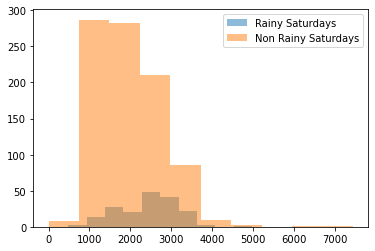

In [25]:
# Graph the results
plt.hist(df_sql_07_rainy_saturdays['duration'], alpha=0.5, label='Rainy Saturdays')
plt.hist(df_sql_07_non_rainy_saturdays['duration'], alpha=0.5, label='Non Rainy Saturdays')
plt.legend(loc='upper right')
plt.show()


### Conclusion<br>

The hypothesis test used in this example is a two-sample t-test. The null hypothesis is that the average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays. The alternative hypothesis is that the average duration of rides from the Loop to O'Hare International Airport does change on rainy Saturdays.

The data is filtered into two separate dataframes: one for rides taken on rainy Saturdays and another for rides taken on non-rainy Saturdays. The mean, standard deviation, standard error of the mean, and t-statistic are calculated for both dataframes. The difference in means, standard error of the difference, and degrees of freedom are also calculated.

The p-value is calculated using the t-test_ind() function from the stats module, with the equal_var parameter set to false to indicate that the variances of the two groups are not equal. A p-value of less than 0.05 is considered statistically significant, and the null hypothesis is rejected if the p-value is less than alpha (0.05). <br>

The test indicate whether the average duration of rides from the Loop to O'Hare International Airport is different on rainy Saturdays. <br>

We reject the null hypothesis:<br>
Thus we would expect the duration to be different. <br>
Visually this is clearly represented on the graph directly ablove.